In [1]:
import os
import glob
import xarray as xr
import matplotlib

## List all data files

In [2]:
data_path = '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/'
file_list = glob.glob(data_path + '*.raw')
file_list.sort()
file_list

['/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T000000.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T013841.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T031743.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T045644.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T063550.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T081451.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T095354.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T113306.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T131207.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T145109.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T163010.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T180922.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T194823.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T212724.raw',
 '/Volumes/wjlee_apl

In [3]:
# Files from Aug 21, 2017 local time
file_list[19:35]

['/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T113343.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T131245.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T145147.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T163049.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T180952.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T194853.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T212802.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T230706.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T000000.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T013902.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T031804.raw',
 '/Volumes/wjlee_apl

## Convert EK60 ``.raw`` to ``.nc`` files

In [4]:
from echopype.convert import ConvertEK60

In [5]:
for fname in file_list[19:35]:
    data_tmp = ConvertEK60(fname)
    data_tmp.raw2nc()

01:20:27  converting file: OOI-D20170821-T063618.raw
01:20:31  converting file: OOI-D20170821-T081522.raw
01:20:35  converting file: OOI-D20170821-T095435.raw
01:20:39  converting file: OOI-D20170821-T113343.raw
01:20:42  converting file: OOI-D20170821-T131245.raw
01:20:46  converting file: OOI-D20170821-T145147.raw
01:20:50  converting file: OOI-D20170821-T163049.raw
01:20:53  converting file: OOI-D20170821-T180952.raw
01:20:57  converting file: OOI-D20170821-T194853.raw
01:21:00  converting file: OOI-D20170821-T212802.raw
01:21:04  converting file: OOI-D20170821-T230706.raw
01:21:05  converting file: OOI-D20170822-T000000.raw
01:21:09  converting file: OOI-D20170822-T013902.raw
01:21:13  converting file: OOI-D20170822-T031804.raw
01:21:16  converting file: OOI-D20170822-T045705.raw
01:21:20  converting file: OOI-D20170822-T063606.raw


## Calibrate data, denoise, and calculate MVBS

In [6]:
from echopype.model import EchoDataEK60

In [7]:
for fname in file_list[19:35]:
    data = EchoDataEK60(fname[:-4]+'.nc')
    data.MVBS_ping_size = 30
    data.MVBS_range_bin_size = 2.5
    data.calibrate(save=True,)  # Calibration and echo-integration
    data.remove_noise(save=True)  # Save denoised Sv to FILENAME_Sv_clean.nc
    data.get_MVBS(save=True)
    os.remove(fname[:-4]+'_Sv.nc')

01:21:25  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618_Sv.nc
01:21:37  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618_Sv_clean.nc
01:21:40  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618_MVBS.nc
01:21:42  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522_Sv.nc
01:21:53  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522_Sv_clean.nc
01:21:56  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522_MVBS.nc
01:21:58  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435_Sv.nc
01:22:08  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435_Sv_clean.nc
01:22:11  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435_MVBS.nc
01:22:13  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T11

## Opening and Visualizing the Results in Parallel

In [1]:
import xarray as xr

In [31]:
data_path = '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/'

In [13]:
res = xr.open_mfdataset(data_path+'*MVBS.nc')

In [14]:
res

<xarray.Dataset>
Dimensions:                   (frequency: 3, ping_time: 3066, range_bin: 83)
Coordinates:
  * frequency                 (frequency) float32 120000.0 38000.0 200000.0
  * range_bin                 (range_bin) int64 0 13 26 39 ... 1040 1053 1066
  * ping_time                 (ping_time) datetime64[ns] 2017-08-21T06:36:18.558000128 ... 2017-08-22T08:14:55.829000192
Data variables:
    MVBS                      (frequency, ping_time, range_bin) float64 dask.array<shape=(3, 3066, 83), chunksize=(3, 198, 83)>
    noise_est_range_bin_size  (ping_time, frequency) float32 dask.array<shape=(3066, 3), chunksize=(198, 3)>
    sample_thickness          (ping_time, frequency) float32 dask.array<shape=(3066, 3), chunksize=(198, 3)>
Attributes:
    noise_est_ping_size:  30

In [15]:
import matplotlib.pyplot as plt

In [16]:
res.coords['depth'] = res.range_bin * res.sample_thickness.sel(frequency=200000).isel(ping_time=0).values
res.coords['depth'] = res.coords['depth'].max() - res.coords['depth']

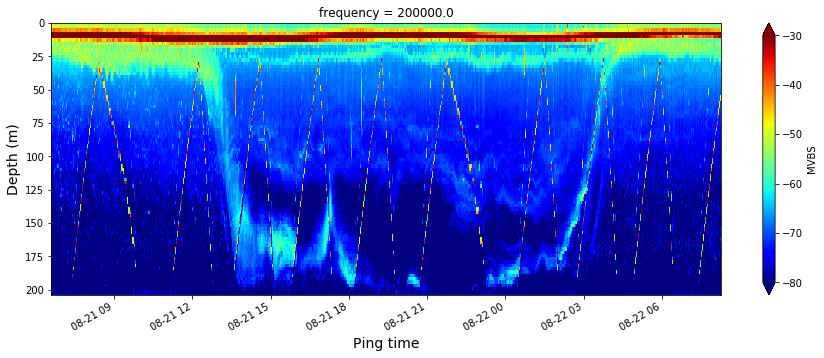

In [17]:
echogram = res.MVBS.sel(frequency=200000).plot(x='ping_time',y='depth',cmap='jet',
                                               vmin=-80,vmax=-30,
                                               aspect=3, size=5)
plt.ylim(res.coords['depth'].max(), 0)
plt.xlabel('Ping time', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.show()

## Adding solar radiation data

In [29]:
import os
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
solar_path = '/Users/wu-jung/code_git/echopype_legacy/misc/data_solar_radiation/'
solar_file = 'eao_buoy_solar_radiation_20170831download.txt'

In [3]:
def read_srad(filefullpath):
    '''
    Read txt file downloaded from **reatlime solar radiation data**
    from http://www.ndbc.noaa.gov/station_page.php?station=46098
    '''
    f = open(filefullpath, 'rU')
    header1 = f.readline().split()
    header2 = f.readline().split()
    data_block = f.readlines()
    
    data = {}
    for col_name in header1:
        data[col_name] = np.ma.zeros(len(data_block), 'f',\
                                     fill_value = -999.999)
        
    for (line_count, line) in enumerate(data_block):
        items = line.split()    
        for (col_count, col_name) in enumerate(header1):
            value = items[col_count]
            if value == "MM":
                value = np.ma.masked
            else:
                value = float(value)
            data[col_name][line_count] = value
            
    f.close()
    return data

In [7]:
srad_data = read_srad(os.path.join(solar_path, solar_file))

/Users/wu-jung/miniconda3/envs/echopype/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'U' mode is deprecated
  


In [19]:
srad_time = np.array([datetime.datetime(year=srad_data['#YY'][x],
                               month=srad_data['MM'][x],
                               day=srad_data['DD'][x],
                               hour=srad_data['hh'][x],
                               minute=srad_data['mm'][x]) for x in range(len(srad_data['#YY']))])

In [20]:
srad_time

array([datetime.datetime(2017, 8, 31, 15, 50),
       datetime.datetime(2017, 8, 31, 15, 40),
       datetime.datetime(2017, 8, 31, 15, 30), ...,
       datetime.datetime(2017, 7, 17, 0, 20),
       datetime.datetime(2017, 7, 17, 0, 10),
       datetime.datetime(2017, 7, 17, 0, 0)], dtype=object)

In [23]:
srad_time = pd.to_datetime(srad_time)
srad_time

DatetimeIndex(['2017-08-31 15:50:00', '2017-08-31 15:40:00',
               '2017-08-31 15:30:00', '2017-08-31 15:20:00',
               '2017-08-31 15:10:00', '2017-08-31 15:00:00',
               '2017-08-31 14:50:00', '2017-08-31 14:40:00',
               '2017-08-31 14:30:00', '2017-08-31 14:20:00',
               ...
               '2017-07-17 01:30:00', '2017-07-17 01:20:00',
               '2017-07-17 01:10:00', '2017-07-17 01:00:00',
               '2017-07-17 00:50:00', '2017-07-17 00:40:00',
               '2017-07-17 00:30:00', '2017-07-17 00:20:00',
               '2017-07-17 00:10:00', '2017-07-17 00:00:00'],
              dtype='datetime64[ns]', length=6384, freq=None)

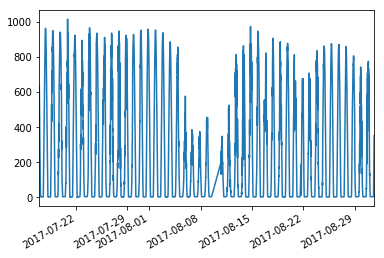

In [30]:
srad_pd_series = pd.Series(srad_data['SRAD1'], index=srad_time)
srad_pd_series.plot()

In [34]:
datetime.datetime(year=2017,month=8,day=21,hour=6,minute=36)

datetime.datetime(2017, 8, 21, 6, 36)

In [8]:
from ndbc import Station
from datetime import datetime

In [16]:
# initialize without getting the data
station = Station(46098)

In [10]:
station.name

'OOI Waldport Offshore'

In [17]:
station.get_stdmet(datetime(2017,7,21), datetime(2017,7,22))

In [43]:
station.atmp

array([  8.,   8.,   8., ..., 999., 999., 999.])

In [61]:
station.time

array([datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 10),
       datetime.datetime(2017, 1, 1, 0, 20), ...,
       datetime.datetime(2017, 12, 31, 21, 10),
       datetime.datetime(2017, 12, 31, 22, 10),
       datetime.datetime(2017, 12, 31, 23, 10)], dtype=object)

In [18]:
_BASEURL = 'http://www.ndbc.noaa.gov/data'
_SENSOR_URL = _BASEURL+'/stations/buoyht.txt'
_REALTIME_URL = _BASEURL+'/realtime2/'
_RECENT_URL = _BASEURL+'/stdmet/'
_HISTORICAL_URL = _BASEURL+'/historical/stdmet/'
_STATION_URL = _BASEURL+'/stations/station_table.txt'

In [19]:
starttime = datetime(2017,7,21)

In [20]:
filename = '46098'+'h'+str(starttime.year)+'.txt.gz'
fileurl = _HISTORICAL_URL+filename

In [24]:
import gzip
import numpy as np
import requests
import urllib

In [25]:
f = gzip.open(urllib.request.urlopen(fileurl))

In [26]:
f

<gzip http.client.HTTPResponse object at 0x11ed9d6a0 0x11ed834a8>

In [27]:
datastart = 2

In [28]:
lines = [line.decode().strip() for line in f.readlines()]

In [30]:
lines[1]

'#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC   mi    ft'

In [29]:
lines[2]

'2017 01 01 00 00 318  7.1 99.0 99.00 99.00 99.00 999 1017.3   8.0  11.3 999.0 99.0 99.00'

In [32]:
srad_url = 'https://www.ndbc.noaa.gov/data/historical/srad/'

In [35]:
filename = '46098'+'r'+str(starttime.year)+'.txt.gz'
fileurl = srad_url+filename

In [36]:
f = gzip.open(urllib.request.urlopen(fileurl))

In [37]:
f

<gzip http.client.HTTPResponse object at 0x11ed9d710 0x11ed9db38>

In [38]:
lines = [line.decode().strip() for line in f.readlines()]

In [39]:
lines[1]

'#yr  mo dy hr mn   w/m2   w/m2   w/m2'

In [41]:
lines[2:10]

['2017 01 01 00 00   81.6 9999.0  282.6',
 '2017 01 01 00 10   34.9 9999.0  287.3',
 '2017 01 01 00 20   28.5 9999.0  318.1',
 '2017 01 01 00 30   17.1 9999.0  308.0',
 '2017 01 01 00 40    7.5 9999.0  342.0',
 '2017 01 01 00 50    4.1 9999.0  327.6',
 '2017 01 01 01 00    3.1 9999.0  327.5',
 '2017 01 01 01 10    1.6 9999.0  297.3']

In [50]:
from datetime import datetime, timedelta

In [63]:
time = []
srad1 = []
for line in lines[datastart:]:
    line = line.split()
    time.append(datetime.strptime(''.join(line[:5]), '%Y%m%d%H%M'))
    nn = 5  # the 6th column is SRAD1
    srad1.append(np.nan if line[nn] == '9999.0' else float(line[nn]))

In [66]:
import pandas as pd

In [76]:
df_srad = pd.DataFrame(srad1, index=time)

In [78]:
df_srad.head()

,0
2017-01-01 00:00:00,81.6
2017-01-01 00:10:00,34.9
2017-01-01 00:20:00,28.5
2017-01-01 00:30:00,17.1
2017-01-01 00:40:00,7.5


In [96]:
np.logical_and(df_srad.index>=pd.to_datetime('2017-07-21'), df_srad.index<=pd.to_datetime('2017-07-22'))

array([False, False, False, ..., False, False, False])

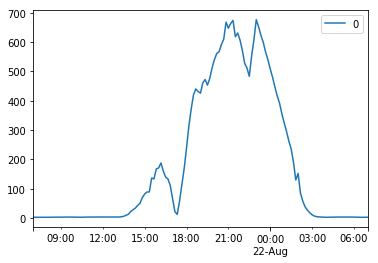

In [101]:
df_srad[np.logical_and(df_srad.index>=pd.to_datetime('2017-08-21 07:00:00'), 
                       df_srad.index<=pd.to_datetime('2017-08-22 07:00:00'))].plot()